# Introduction to statistics

In [1]:
import math as m
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

#Import the stats library
from scipy import stats

#from sympy import *
#import sympy
#sympy.init_printing()
#import os
#data_path = '/Users/User/Desktop/Mathematics/Khan'
#os.chdir(data_path)

# Discrete Random Variables
---
### Expected value (mean)
$E(x) = \mu_x = \sum_{i=1}^{n} x_ip(x_i)$

### Population Variance
$Var(x) = \sigma_x^2 = \sum_{i=1}^{n}(x_i - \mu)^2 p(x_i) $

$Var(x) = E[(x - \mu)^2] =E(x^2) - E(x)^2 $

*Note that sample variance is calculated differently*

### Skeweness
The standardized third moment about the mean is called the skewness. It measures the "shift to the left or right" with respect to the assymetric shape. The tail is longer and the mass is concentrated on one side

$\alpha_3 = {\frac{E(X - \mu)^3}{\sigma ^ 3} } = {\frac{E(X - \mu)^3}{var(x) ^{3/2}} }$

### Kurtosis
The standardized fourth moment about the mean is called the kurtosis. It is a measure of outliers: either existing outliers (for the sample kurtosis) or propensity to produce outliers (for the kurtosis of a probability distribution).

$\alpha_4 = {\frac{E(X - \mu)^4}{\sigma ^ 4} }$


In [2]:
#Define a random variable X and its frequency distribution and probability density function
X = np.array([61,64,67,70,73])
FX = np.array([5,18,42,27,8])
PX = FX / sum(FX)

#Expectation of X:
E_X = (X*PX).sum()

#Variance of X
Var_X = (X**2 * PX).sum() - E_X**2

#Skeweness of X
Skew_X = (((X - E_X)**3)*PX).sum() / (Var_X)**1.5

print("Expectation E(x) = ",E_X)
print("Variance Var(x) = ",Var_X)
print("Skeweness of x = ",Skew_X)

Expectation E(x) =  67.45
Variance Var(x) =  8.5275
Skeweness of x =  -0.108154371123


## Probability Density Function (PDF)

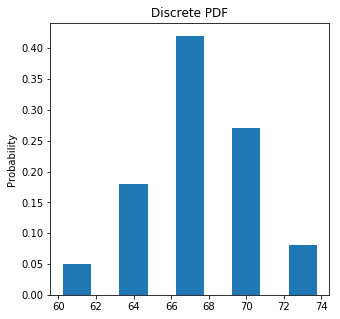

In [3]:
plt.figure(figsize = (5,5))
plt.bar(X,PX, width = 1.5)
plt.title('Discrete PDF')
plt.ylabel('Probability')
plt.show()
#Pl

## Cumulative Distribution Function 

$cdf = \sum p(x) $

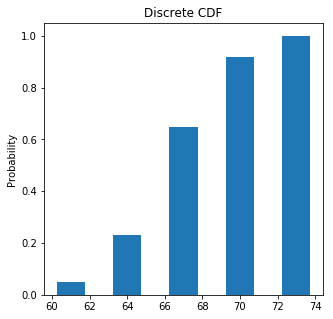

In [4]:
CDF_X = PX.cumsum()
plt.figure(figsize = (5,5))
plt.bar(X,CDF_X, width = 1.5)
plt.title('Discrete CDF')
plt.ylabel('Probability')
plt.show()


# Central Limit Theorem

Given the following population parameters:

$\mu = $ population mean 

$\sigma = $ population standard deviation 

The sampling statistics are:

$\mu_\bar{x} = $ sample mean

## Standard Error
The variance of the sampling distribution of the sample mean decreases with n, the sample size

$\sigma_{\bar{x}}^2 = {\frac{\sigma^2}{n}} $

$\sigma_{\bar{x}} = {\frac{\sigma}{\sqrt{n}}} $

The population parameters are: E(X) = 3.5, Std(X) = 1.708
The sampling distribution of the means statistics are: mean = 3.5, std = 0.054
The standard error is 0.054


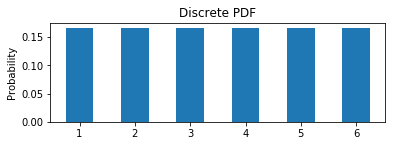

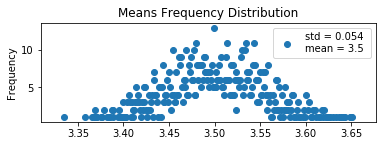

In [19]:
#Sample size = n, number of repeats = k
n, k = (1000,1000)

#Define probability density function
X = np.array([1,2,3,4,5,6])
PX = np.array([1,1,1,1,1,1])/6
E_X = (X*PX).sum()
Var_X = (X**2 * PX).sum() - E_X**2
Std_X = np.sqrt(Var_X)
std_error = np.sqrt(Var_X/n)


means_array = np.array([])

for i in range(k):
    sample_mean = np.random.choice(X,size = n).mean()
    means_array = np.append(means_array,sample_mean)

means_std = round(means_array.std(ddof = 1),3)
means_means = round(means_array.mean(),3)

print("The population parameters are: E(X) = {}, Std(X) = {}".format(E_X,round(Std_X,3)))
print("The sampling distribution of the means statistics are: mean = {}, std = {}".format(means_means,means_std))
print("The standard error is {}".format(round(std_error,3)))

val,freq = np.unique(means_array,return_counts=True)

plt.subplot(2,1,1)
plt.bar(X,PX, width = 0.5)
plt.title('Discrete PDF')
plt.ylabel('Probability')
plt.show()

plt.subplot(2,1,2)
plt.scatter(val,freq, label = 'std = {} \nmean = {}'.format(means_std,means_means))
plt.title('Means Frequency Distribution')
plt.ylabel('Frequency')
plt.legend(loc = 'upper right')
plt.show()

# Correlation Coefficient (for samples)

Also called Pearson's coefficient - 

$ r=r_{xy}={\frac {1}{n-1}}\sum _{i=1}^{n}\left({\frac {x_{i}-{\bar {x}}}{s_{x}}}\right)\left({\frac {y_{i}-{\bar {y}}}{s_{y}}}\right)$

where:
- $n$ is the sample size
- $ x_i,y_i $ are the single samples indexed with i

- $ {\bar {x}}={\frac {1}{n}}\sum _{i=1}^{n}x_{i}$ (the sample mean)
- $\left({\frac {x_{i}-{\bar {x}}}{s_{x}}}\right)$ is the standard score, or z-score
- $ s_{x}={\sqrt {{\frac {1}{n-1}}\sum _{i=1}^{n}(x_{i}-{\bar {x}})^{2}}} $ 

or alternatively $r=r_{xy}={\frac {\sum x_{i}y_{i}-n{\bar {x}}{\bar {y}}}{(n-1)s_{x}s_{y}}}$

In [6]:
def pearsons_sample_corr(x,y):
    ''' Pearsons correlation coefficient using only the numpy and maths module 
        Note that this version is for samples (not population) and makes use of the broadcasting 
        functionalities of the numpy library
        The scipy version is scipy.stats.pearsonr(X1,Y1)
        ----------------------'''
    
    n = len(x)
    mx = x.mean()
    my = y.mean()
    sx = x.std(ddof = 1) #ddof param for sample 
    sy = y.std(ddof = 1)
    num = np.add.reduce(x * y) - n*mx*my #Note the use of broadcasting, no loops
    denum = (n-1)*sx*sy
    r = num/denum
    return r

In [7]:
X = np.array([1,2,2,3])
Y=np.array([1,2,3,6])
%time pearsons_sample_corr(X,Y)

CPU times: user 375 µs, sys: 43 µs, total: 418 µs
Wall time: 397 µs


0.94491118252306805

# Simple linear regression - Least Square Method

The general formlula for the simple linear regression is: 

$ \hat {y} = m \cdot x + b $

$ m = r {\frac {s_y}{s_x}} $ which can also be written as $ m = \frac{S_{x,y}}{\sigma_{x}^{2}}\quad $

$ b = \bar{y} - r {\frac {s_y}{s_x}} \cdot \bar{x} $

Where
- $r$ is Pearson's coefficient
- $s_x $ is the sample standard deviation of $x$ 
- $s_y $ is the sample standard deviation of $y$
- $s_{xy} $ is the covariance of $x$ and $y$
- $\sigma_{x}^{2}$ the variance of $x$
- $\bar{x}, \bar{y}$ are the sample mean of $x$ and $y$


In [8]:
def simple_linear_reg(x,y):
    r = pearsons_sample_corr(x,y)
    sx = x.std(ddof = 1)
    sy = y.std(ddof = 1)
    xm = x.mean()
    ym = y.mean()
    m = r * (sy/sx)
    b = ym - m * xm
    y_prediction = m * x + b
    print('The linear regression model is y = {}x + {}'.format(m,b))
    return y_prediction

In [9]:
simple_linear_reg(X,Y)

The linear regression model is y = 2.5x + -2.0


array([ 0.5,  3. ,  3. ,  5.5])

# Residuals, Errors and [Sum of Squares][1]

A data set has n values marked $ y_1,...,yn $ each associated with a predicted (or modeled) value $ \hat {y}_i...\hat{y}_n $

- The residuals are $ e_i = y_i − \hat{y}_i  $ (forming a vector e).

- $ \bar {y} $ is the mean of the observed data: $ \bar {y}={\frac {1}{n}}\sum _{i=1}^{n}y_{i} $

Then the variability of the data set can be measured using three sums of squares formulas:

 - The **total sum of squares** (proportional to the variance of the data):

    $ TSS = SS_{\text{tot}}=\sum _{i}(y_{i}-{\bar {y}})^{2} $

- The **regression sum of squares**, also called the explained sum of squares:

    $ ESS = SS_{\text{reg}}=\sum _{i}(\hat{y}_i-{\bar {y}})^{2} $

- The **sum of squares of residuals**, also called the residual sum of squares:

    $ RSS = {\displaystyle SS_{\text{res}}=\sum _{i}(y_{i}-\hat{y}_{i})^{2}=\sum _{i}e_{i}^{2}\,} $

The most general definition of the coefficient of determination is

$ R^{2}\equiv 1-{SS_{\rm {res}} \over SS_{\rm {tot}}}\, $ or $ R^{2} = 1 - \frac{RSS}{TSS} $


The Root Mean Squared Error (RMSE) is the standard deviation of the residuals $e$ : 

$ RSME = \sqrt{\frac {\sum _{i}(y_{i}-\hat{y}_{i})^{2}} {n-1} }$

[1]: https://en.wikipedia.org/wiki/Coefficient_of_determination

In [10]:
def residual_errors(x,y):
    y_prediction = simple_linear_reg(x,y)
    e = y - y_prediction
    TSS = np.add.reduce((y - y.mean())**2)
    ESS = np.add.reduce((y_prediction- y.mean())**2)
    RSS = np.add.reduce((y - y_prediction)**2)
    RMSD = e.std(ddof = 1)
    
    print('TSS = {}'.format(TSS))
    print('ESS = {}'.format(ESS))
    print('RSS = {}'.format(RSS))
    print('RMSD = {}'.format(RMSD))
    return e    

In [11]:
residual_errors(X,Y)

The linear regression model is y = 2.5x + -2.0
TSS = 14.0
ESS = 12.5
RSS = 1.5
RMSD = 0.7071067811865476


array([ 0.5, -1. ,  0. ,  0.5])

In [12]:
m.sqrt(1.5 / 3)

0.7071067811865476

# Normal Distribution

The [normal distribution][1] is a very common continuous probability distribution found in natural processes. A random variable with a Gaussian distribution is said to be normally distributed and is called a normal deviate. The normal distribution is particularly important due to the central limit theorem.


The **probability density** of the normal distribution is:


- $ pdf(x,\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}}e^\frac{-1}{2z^2} $

The **cumulative density** is:

- $ cdf(a,b,\mu,\sigma) =  \int_a^b \frac{1}{ \sigma \sqrt{2 \pi}} e^{\left(-\frac{{\left(\mu - x\right)}^{2}}{2 \, \sigma^{2}}\right)} dx $

Which can be written in terms of the error function $ erf $ 

- $ cdf(a,b,\mu,\sigma) =  - \frac{1}{2} \, \text{erf}\left(\frac{\sqrt{2} (a-\mu)}{2 \, \sigma}\right) + \frac{1}{2} \, \text{erf}\left(\frac{\sqrt{2} (b -\mu)}{2 \, \sigma}\right) $


where

- $z=\frac{(X-\mu)}{\sigma}$

- $\mu$  is the mean or expectation of the distribution (and also its median and mode).

- $\sigma$  is the standard deviation

- $\sigma ^{2}$ is the variance

### The Normal Distribution is summarized below:

[1]: https://en.wikipedia.org/wiki/Normal_distribution

In [13]:
from IPython.display import Image
Image(url='http://upload.wikimedia.org/wikipedia/commons/thumb/2/25/The_Normal_Distribution.svg/725px-The_Normal_Distribution.svg.png')

### Defining the PDF and CDF functions

In [14]:
def pdf_normal(x,mu,sigma):
    return (1/(sigma * np.sqrt(2*np.pi)) * np.exp(-(mu-x)**2 / (2*sigma**2)))

def cdf_normal(a,b,mu,sigma):
    return (-0.5 * m.erf((m.sqrt(2)*(a - mu)) / (2*sigma)) + 0.5 * m.erf((m.sqrt(2)*(b - mu)) / (2*sigma)))
    
def z_score(x,mu,sigma):
    return (x - mu)/ sigma

### Visualizing the Normal Probability Density Function (PDF) 

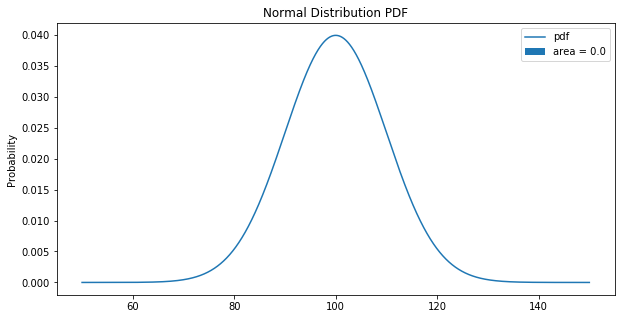

In [15]:
# Create a range and define parameters
mean, std = 100,10
X = np.arange(mean-5*std,mean+5*std,0.01)
Y = pdf_normal(X,mean,std)

# Specify a and b ranges for CDF and color filling
a,b = 110,110
Xfill = np.arange(a,b,0.01)
Yfill = pdf_normal(Xfill,mean,std)
area = cdf_normal(a,b,mean,std)


#Plot the figure
plt.figure(figsize=(10,5))
plt.plot(X,Y, label = 'pdf')
plt.title('Normal Distribution PDF')
plt.ylabel('Probability')
plt.fill_between(Xfill,Yfill,0, label = 'area = {}'.format(round(area,2)))
plt.legend(loc = 'upper right')
plt.show()

## Visualizing the Normal Cumulative Density Function (CDF)

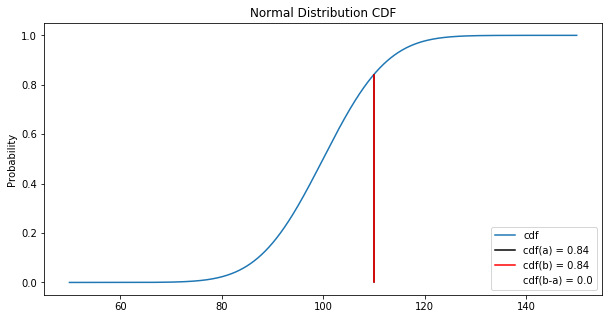

In [16]:
#Based on parameters from above - calcualte CDF values
Ycdf = [cdf_normal(-mean+5*std,i,mean,std) for i in X]
Xfill = np.arange(a,b,0.01)
Yfill = [cdf_normal(-mean+5*std,j,mean,std) for j in Xfill]
cdf_ab = round(cdf_normal(a,b,mean,std),2)
cdf_a = round(cdf_normal(0,a,mean,std),2)
cdf_b = round(cdf_normal(0,b,mean,std),2)

#Plot the figure 
plt.figure(figsize=(10,5))
plt.plot(X,Ycdf, label = 'cdf')
plt.title('Normal Distribution CDF')
plt.ylabel('Probability')

# draw vertical line from (70,100) to (70, 250)
plt.plot([a,a],[0,cdf_a],'k-', label = 'cdf(a) = {}'.format(cdf_a))
plt.plot([b,b],[0,cdf_normal(0,b,mean,std)],'r-', label = 'cdf(b) = {}'.format(cdf_b))
plt.plot([b,b],[0,0],'w-', label = 'cdf(b-a) = {}'.format(cdf_ab))

#plt.fill_between(Xfill,Yfill,0, color = '1',label = 'CDF (a,b) = {}'.format(round(area,2)))
plt.legend(loc = 'lower right')
plt.show()
